# ============================================================
# Assignment: Perceptron & Activation Functions
# ============================================================
---

## Instructions:
- This assignment contains **two parts**.
- Fill in all code and explanation sections where indicated.
- Do NOT use high-level ML libraries like TensorFlow or PyTorch for implementation.
- You may use NumPy, Matplotlib, and scikit-learn for dataset generation and visualization.
---

## Part 1 — Perceptron from Scratch

### Q1. Dataset Preparation
1. Generate a **2D dataset** with 2 classes using `make_blobs` from scikit-learn.
2. Convert labels so that one class is `-1` and the other is `1`.
3. Visualize the dataset using a scatter plot.

**Your Task:**
- Write the code to generate and visualize the dataset.
- Provide the plot in your answer.


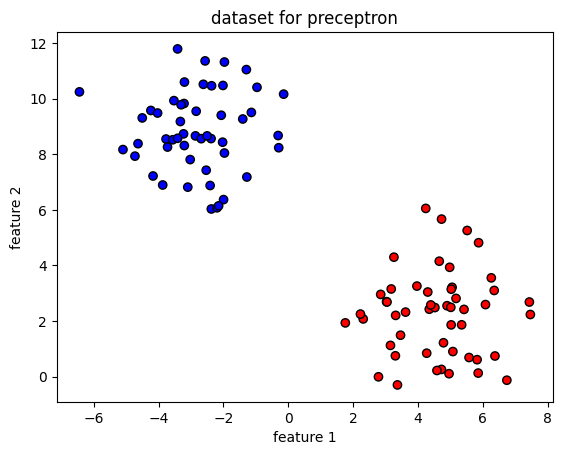

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100,centers=2,random_state=42,cluster_std=1.5)
y = np.where(y == 0,-1,1)

plt.scatter(X[:,0],X[:,1],c= y,edgecolor = 'k',cmap = 'bwr')
plt.title("dataset for preceptron")
plt.xlabel("feature 1")
plt.ylabel("feature 2") 
plt.show()


### Q2. Perceptron Implementation
1. Create a Python class `Perceptron` with:
   - `__init__` — initializes learning rate, number of epochs, and weights/bias.
   - `fit(X, y)` — trains the perceptron using the **Perceptron Learning Rule**.
   - `predict(X)` — returns predictions for given input features.
2. Use the update rule:  
$$
w \gets w + \eta (y_i - \hat{y}_i) x_i
$$
3. Train the Perceptron on your dataset.

**Your Task:**
- Implement and train the Perceptron.
- Display the final weights and bias.


In [6]:
class perceptron:
    def __init__(self,lr = 0.01,epochs = 100):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None
    def predict(self,X):
        linear_output  = np.dot(X,self.w) + self.b
        return np.where(linear_output>=0,1,-1)
    def fit(self,X,y):
        n_samples,n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            for idx,x_i in enumerate(X):
                y_pred = self.predict(x_i)
                update = self.lr*(y[idx] - y_pred)
                self.w += update*x_i
                self.b += update



In [14]:
model = perceptron(lr=0.01,epochs=100)
model.fit(X,y)

print("weights :",model.w)
print("bias:",model.b)

weights : [ 0.18984829 -0.1036385 ]
bias: 0.0


### Q3. Decision Boundary
1. Write a function to plot the decision boundary of your trained perceptron.
2. Visualize the boundary along with the dataset.

**Your Task:**
- Provide the decision boundary plot.
- Explain in **2–3 sentences** how the perceptron separates the two classes.


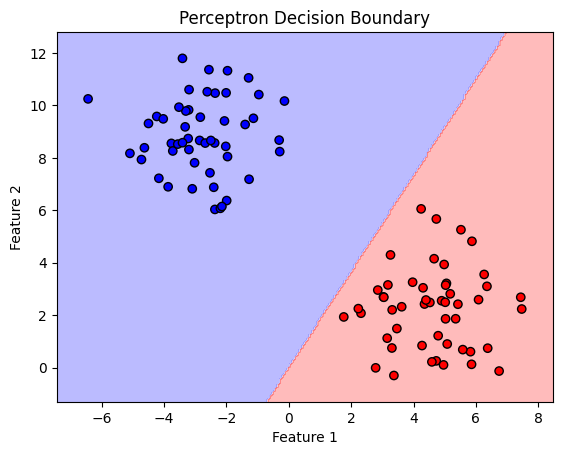

In [16]:
def decision_boundary(X,y,model):
    X_min,X_max = X[:,0].min() - 1,X[:,0].max() + 1
    y_min,y_max = X[:,1].min() - 1,X[:,1].max() + 1
    xx,yy = np.meshgrid(np.linspace(X_min,X_max,200),
                        np.linspace(y_min,y_max,200))
    
    Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,alpha = 0.3,cmap = 'bwr')
    plt.scatter(X[:,0],X[:,1],c = y,cmap='bwr',edgecolor = 'k')
    plt.title("Perceptron Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
decision_boundary(X,y,model)

**Explanation (2–3 sentences):**



## Part 2 — Activation Functions

### Q4. Activation Function Implementation
Implement the following activation functions and their derivatives:
- Sigmoid
- Tanh
- ReLU
- Leaky ReLU
- Softmax

**Your Task:**
- For each activation function:
  - Write the forward pass formula.
  - Write the derivative formula.

| Function   | Formula | Derivative |
|------------|---------|------------|
| Sigmoid    | $\sigma(x) = \frac{1}{1+e^{-x}}$ | $\sigma'(x) = \sigma(x)\,(1 - \sigma(x))$ |
| Tanh       | $\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$ | $1 - \tanh^2(x)$ |
| ReLU       | $f(x) = \max(0, x)$ | $f'(x) = \begin{cases} 1 & x > 0 \\ 0 & x \le 0 \end{cases}$ |
| Leaky ReLU | $f(x) = \max(\alpha x, x)$ | $f'(x) = \begin{cases} 1 & x > 0 \\ \alpha & x \le 0 \end{cases}$ |
| Softmax    | $\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}$ | $\frac{\partial y_i}{\partial x_j} = y_i (\delta_{ij} - y_j)$ |



In [3]:
import numpy as np
def sigmoid(X):
    return 1/(1+np.exp(-X))
def sigmoid_derivative(X):
    s = sigmoid(X)
    return s*(1-s)

def tanh(X):
    return (np.exp(X) - np.exp(-X))/(np.exp(X) + np.exp(-X))

def tanh_derivative(X):
    t = tanh(X)
    return 1 - t**2

def reLU(X):
    return np.maximum(0,X)
def reLU_derivative(X):
    return np.where(X>0,1,0)

def Leaky_reLU(X,alpha = 0.01):
    return np.maximum(alpha*X,X)

def Leaky_reLU_derivative(X,alpha= 0.01):
    return np.where(X>0,1,alpha)
def Softmax(X):
    if X.ndim == 1:
        X = X - np.max(X)
        exp_X = np.exp(X)
        return exp_X / np.sum(exp_X)
    else:
        exp_X = np.exp(X - np.max(X, axis=1, keepdims=True))
        return exp_X / np.sum(exp_X, axis=1, keepdims=True)
    
def Softmax_derivative(softmax_out):
    if softmax_out.ndim == 1:
        s = softmax_out.reshape(-1,1)
        return np.diagflat(s) - np.dot(s,s.T)
    else:
        jacobians = []
        for row in softmax_out:
            s = row.reshape(-1,1)
            jacobians.append(np.diagflat(s)- np.dot(s,s.T))
        return np.array(jacobians)
    

### Q5. Testing Activation Functions
1. Choose input values: `[-2, -1, 0, 1, 2]`.
2. Apply each activation function to these inputs.
3. Record the outputs in a table.

**Output Table:**
| Input | Sigmoid | Tanh | ReLU | Leaky ReLU | Softmax |
|-------|---------|------|------|------------|---------|
| -2    |         |      |      |            |         |
| -1    |         |      |      |            |         |
| 0     |         |      |      |            |         |
| 1     |         |      |      |            |         |
| 2     |         |      |      |            |         |


In [11]:
inputs = np.array([-2,-2,0,1,2])
outputs = []
for val in inputs:
    outputs.append([
        val,
        sigmoid(val),
        tanh(val),
        reLU(val),
        Leaky_reLU(val),
        Softmax(inputs)[list(inputs).index(val)]
    ])

import pandas as pd
df  = pd.DataFrame(outputs,columns=['Input','Sigmoid','Tanh','ReLU','Leaky ReLU','Softmax'])
df


,Input,Sigmoid,Tanh,ReLU,Leaky ReLU,Softmax
0,-2,0.119203,-0.964028,0,-0.02,0.011894
1,-2,0.119203,-0.964028,0,-0.02,0.011894
2,0,0.500000,0.000000,0,0.00,0.087889
3,1,0.731059,0.761594,1,1.00,0.238907
4,2,0.880797,0.964028,2,2.00,0.649416


### Q6. Visualization of Activation Functions
1. Plot each activation function for input range `[-5, 5]`.
2. Compare their shapes visually.

**Your Task:**
- Provide the plots for all activation functions.
- In **3–4 sentences**, explain how the choice of activation function can affect learning in a neural network.


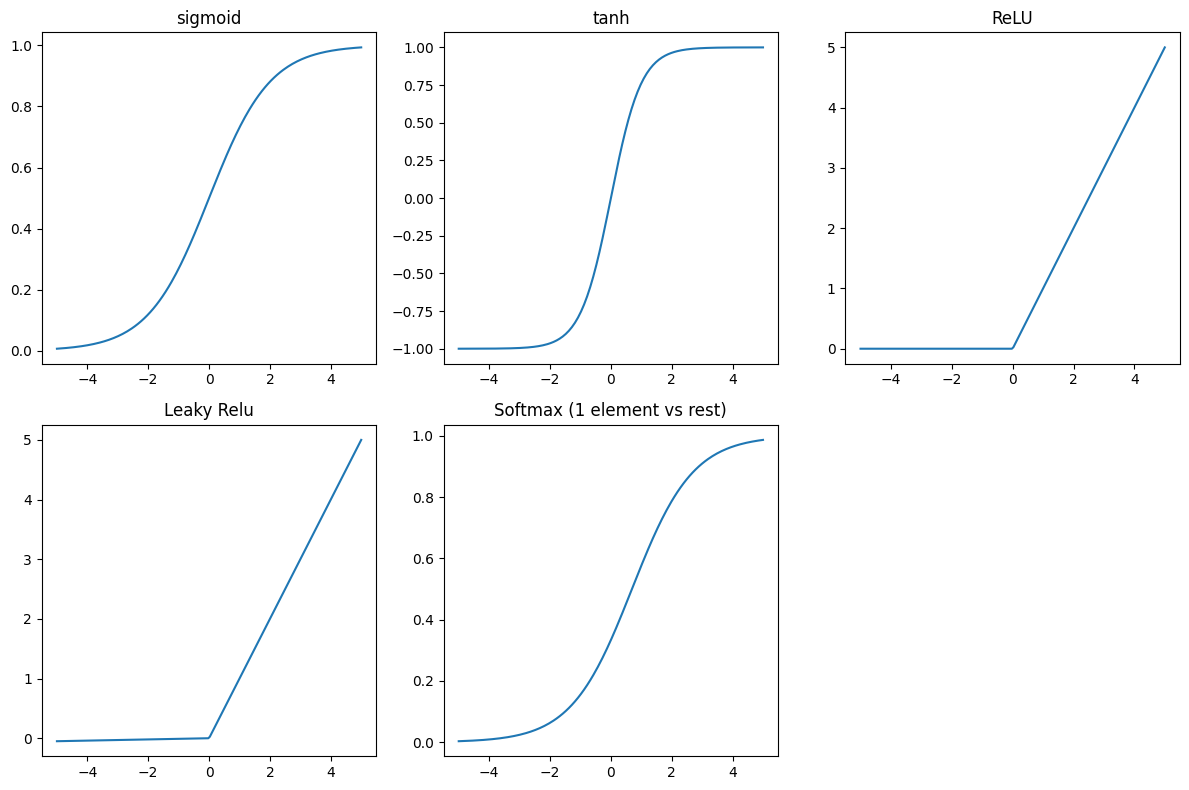

In [21]:
import matplotlib.pyplot as plt 
x_vals =   np.linspace(-5,5,200)
plt.figure(figsize = (12,8))

plt.subplot(2,3,1)
plt.plot(x_vals,sigmoid(x_vals))
plt.title("sigmoid")


plt.subplot(2,3,2)
plt.plot(x_vals,tanh(x_vals))
plt.title("tanh")


plt.subplot(2,3,3)
plt.plot(x_vals,reLU(x_vals))
plt.title("ReLU")


plt.subplot(2,3,4)
plt.plot(x_vals,Leaky_reLU(x_vals))
plt.title("Leaky Relu")


# Softmax (single-dim demonstration)
plt.subplot(2, 3, 5)
softmax_outputs = [Softmax(np.array([v, 0, 0]))[0] for v in x_vals]
plt.plot(x_vals, softmax_outputs)
plt.title("Softmax (1 element vs rest)")


plt.tight_layout()
plt.show()

**Explanation (3–4 sentences):**

 * Activation functions decide how a neural network learns by adding non-linearity, letting it understand complex patterns in data.
 * Sigmoid and Tanh are smooth and squash values between limits, but sometimes cause slow learning because their gradients get very small for big inputs.
 * ReLU and Leaky ReLU fix this by letting positive values pass through unchanged, which helps the network learn faster and avoid the “vanishing gradient” problem.
 * Softmax is used at the output layer to turn numbers into probabilities, helping the model pick the most likely class
 * Choosing the right activation function can make training more efficient and improve how well your network performs.